> # <font color='red'>CROSS VALIDATION<font>

***

**We are going to practice 5 types of cross validation techniques<br>**

**1. K-fold CV**<br>
**2. Bootstrap sampling**<br>
**3. LOO CV-Leave one out**<br>
**4. GridSearch CV**<br>
**5. RandomSerch CV**

<font color='red'>**1. KFold CV**<font>

In [1]:
# Importing relevent libraries

from pandas import read_csv
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression

import numpy as np

import warnings                      #just for knowledge,use is not recommanded
warnings.filterwarnings('ignore')

In [2]:
df=read_csv(r'D:\Datasets\12.pima-indians-diabetes.csv')
df.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.shape

(768, 9)

In [4]:
df.isnull().sum() #There is no null value

Preg     0
Plas     0
Pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [5]:
X=df.drop('class',axis=1)
Y=df['class']

- **KFold-** divides the datasets in K parts, keeps K-1 for training and 1 for test. and it create K sets where 
 Training set is changed every time, thats why we will see K no of results. Sampling is without replacement in this method (No repetition of data).

- **cross_val_score-**it will give accuracy score for each set to cross validation.

In [6]:
K=20 # No of folds # so I am using 19 parts for training and 1 part for validation
seed=7 # Random state

kfold=KFold(n_splits=K,shuffle=True,random_state=seed)                #KFold declairation

model=LogisticRegression(max_iter=1000,tol=0.001)                     #model declairation, we are using Logistic regression

results=cross_val_score(model,X,Y,cv=kfold)
print(results)
print('============================================================')
print('Result Summary')
print('Mean Accuracy: %.2f%%, Accuracy Deviation:%.2f%%'%(results.mean()*100,results.std()*100)) # Printing result Summary

[0.82051282 0.87179487 0.76923077 0.71794872 0.82051282 0.74358974
 0.84615385 0.71794872 0.78947368 0.84210526 0.76315789 0.76315789
 0.52631579 0.76315789 0.84210526 0.76315789 0.86842105 0.78947368
 0.78947368 0.68421053]
Result Summary
Mean Accuracy: 77.46%, Accuracy Deviation:7.59%


<font color='red'>**2. Bootstrap Sampling**<font>

- In my opinion worst method of sampling, It basically randomly resample train data and send rest of data in validation data

In [7]:
#This line of code is just for demonstration of its function

from sklearn.utils import resample

data=[1,2,3,4,5,6,7,8,9,10]
n_iterations=10
n_size=int(len(data)-1)

for i in range(n_iterations):
    train=resample(data,n_samples=n_size)
    test=np.array([x for x in data if x not in train])
    print('Train data: ',train,'  |  ','Test data: ',test)

Train data:  [3, 1, 2, 8, 4, 10, 6, 6, 3]   |   Test data:  [5 7 9]
Train data:  [8, 1, 1, 3, 3, 6, 9, 8, 8]   |   Test data:  [ 2  4  5  7 10]
Train data:  [8, 1, 2, 8, 10, 1, 5, 9, 3]   |   Test data:  [4 6 7]
Train data:  [6, 2, 10, 3, 2, 5, 9, 5, 1]   |   Test data:  [4 7 8]
Train data:  [5, 5, 4, 7, 4, 6, 9, 4, 4]   |   Test data:  [ 1  2  3  8 10]
Train data:  [6, 3, 5, 2, 3, 2, 2, 10, 5]   |   Test data:  [1 4 7 8 9]
Train data:  [10, 10, 10, 1, 4, 2, 5, 6, 9]   |   Test data:  [3 7 8]
Train data:  [6, 10, 6, 1, 8, 4, 7, 9, 7]   |   Test data:  [2 3 5]
Train data:  [6, 10, 2, 1, 1, 4, 3, 4, 6]   |   Test data:  [5 7 8 9]
Train data:  [3, 5, 4, 5, 5, 9, 5, 7, 3]   |   Test data:  [ 1  2  6  8 10]


In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
import pandas as pd

from sklearn.datasets import load_iris

In [9]:
iris=load_iris()

In [10]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [11]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [12]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [13]:
type(iris)

sklearn.utils.Bunch

In [14]:
# Convering from Bunch to Complete dataset
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [15]:
df['target']=df['target'].map({0:'setosa', 1:'versicolor', 2:'virginica'})

In [16]:
df  # Now this is in format we normally get data. So we start from here.

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [17]:
values=df.values                    # Converting to numpy array
n_iterations=10                     # No of iterations                    
n_size=int(len(df)-30)            # There are minimum 30 no of test samples, we can not select total by this method as 
scores=list()                       # .. each value is sampled after replacement.

for i in range(n_iterations):
    train=resample(values,n_samples=n_size)
    test=np.array([x for x in values if x.tolist() not in train.tolist()])
    
    rfc1=RandomForestClassifier()
    rfc1.fit(train[:,:-1],train[:,-1])
    predictions=rfc1.predict(test[:,:-1])
    score=accuracy_score(test[:,-1],predictions)
    print(round(score*100,2),"%")
#     print('Train data: ',train,'  |  ','Test data: ',test)
    scores.append(score)
    score_mean=sum(scores)/len(scores)
print('Average accuracy: ',round(score_mean*100),'%')

91.8 %
98.53 %
93.65 %
93.22 %
96.97 %
92.42 %
98.39 %
96.88 %
93.94 %
94.12 %
Average accuracy:  95 %


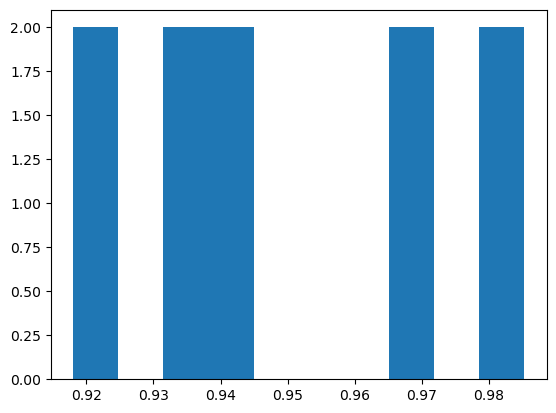

95.0 confidence interval 91.9% and 98.5%


In [18]:
pyplot.hist(scores)
pyplot.show()
alpha=0.95
p=((1-alpha)/2)*100              
lower=max(0,np.percentile(scores,p))
p=((1+alpha)/2)*100
upper=np.percentile(scores,p)
print('%.1f confidence interval %.1f%% and %.1f%%'%(alpha*100,lower*100,upper*100))

<font color='red'>**3. Leave one out CV**<font> <br>
- We use all the data for training and leave only one out for testing

In [19]:
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LinearRegression

In [20]:
df=pd.DataFrame({'y':[6,8,12,14,14,15,17,22,24,23],
                 'x1':[2,5,4,3,4,6,7,5,8,9],
                 'x2':[14,12,12,13,7,8,7,4,6,5]})

In [21]:
df

,y,x1,x2
0,6,2,14
1,8,5,12
2,12,4,12
3,14,3,13
4,14,4,7
5,15,6,8
6,17,7,7
7,22,5,4
8,24,8,6
9,23,9,5


In [22]:
X=df[['x1','x2']]
Y=df['y']

In [23]:
#cross validation method
cv=LeaveOneOut()

#build multiple linear regression model
model=LinearRegression()

#use LOOCV to evaluate model
scores=cross_val_score(model,X,Y,scoring='neg_mean_absolute_error',cv=cv,n_jobs=-1)

#view RMSE
np.sqrt(np.mean(np.absolute(scores)**2)/len(scores))

1.144572635722584

In [24]:
scores # there are total 10 sets

array([-1.7159581 , -4.91317829, -1.37391167, -6.76454294, -3.88354531,
       -2.18982218, -2.22270204, -3.37927664, -4.43852243, -0.5800885 ])

***

# <font color='blue'>**Hyperparameter Tuning**<font>
    
**Fine tuning the hyperparameters is done in a sequence of steps**<br><br>
    1.Selecting the appropriate model type (regressor or classifier).<br>
    2.Identify the correspomding parameter space.<br>
    3.Decide the method for searching or sampling parameter space.<br>
    4.Decide the cross validation scheme to ensure model will generalize.<br>
    5.Decide a score function to use to evaluate the model.<br>
<br><br>
**Two generic approaches to search hyperparameter space include:**<br><br>
    1.GridSearchCV which exhaustively considers all parameter combinations.<br>
    2.RandomizedSearchCV can sample a given number of candidates from a parameter space with a specified distribution.<br><br><br>
**Other considerations**<br><br>
    1.While tuning hyper parameters, the data should have been split into three parts to **prevent data leak**<br>
- training<br>
- validation<br>
- testing<br><br>

**Note:-** First 3 techniques are used for cross validation only, next 2 are used for both cross validation and hyperparameter tuning.

<font color='blue'>**4. GridSearchCV**<font>
- It search for all of the combinations of hyper-parameter grid.

In [25]:
df

,y,x1,x2
0,6,2,14
1,8,5,12
2,12,4,12
3,14,3,13
4,14,4,7
5,15,6,8
6,17,7,7
7,22,5,4
8,24,8,6
9,23,9,5


In [26]:
df=pd.read_csv(r'D:\Datasets\12.pima-indians-diabetes.csv')
df

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [27]:
x=df.drop('class',axis=1)
y=df['class']

### Divide your data into Training, Validation and Testing Data

In [28]:
#using 20% of data for final testing
#rest of the 80% for training and validation process

# step 1:
    #1. First divide dataset into training (20%) and testing (80%)
    #2. Next divide the 80% to training and testing as per requirement
    
sample_x, test_x, sample_y, test_y = train_test_split(
                                                        x,y
                                                        ,test_size=0.2
                                                        ,random_state=89)
    
train_x, validation_x, train_y, validation_y = train_test_split(
                                                        sample_x,sample_y
                                                        ,test_size=0.2
                                                        ,random_state=45)

In [29]:
print('Total dataset: ',len(x.values))
print('Total test data saved for future use: ',len(test_x+test_y))
print('Total training data: ',len(train_x+train_y))
print('Total validation data: ',len(validation_x+validation_y))

Total dataset:  768
Total test data saved for future use:  154
Total training data:  491
Total validation data:  123


In [30]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf=KNeighborsClassifier()

In [31]:
# knn_clf.get_params()

# result:
#     {'algorithm': 'auto',
#  'leaf_size': 30,
#  'metric': 'minkowski',
#  'metric_params': None,
#  'n_jobs': None,
#  'n_neighbors': 5,
#  'p': 2,
#  'weights': 'uniform'}

In [32]:
param_grid={'algorithm': ('auto','ball_tree','kd_tree','brute') # after looking at results we know that algo: auto and n_neig:8
             ,'n_neighbors':list(range(1,9)) 
           } # list(range(1,9))                  # are best fit

In [33]:
from sklearn.model_selection import GridSearchCV

gs=GridSearchCV(knn_clf,param_grid,cv=20)

In [34]:
gs.fit(train_x,train_y)

GridSearchCV(cv=20, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'),
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8]})

In [35]:
gs.best_estimator_

KNeighborsClassifier(n_neighbors=8)

In [36]:
gs.best_params_

{'algorithm': 'auto', 'n_neighbors': 8}

In [37]:
print(round(gs.best_score_,2)*100,'%')

76.0 %


In [38]:
print('Validation Score: {}%'.format(round(gs.score(validation_x,validation_y)*100,2)))

Validation Score: 67.48%


In [39]:
gs.cv_results_['mean_test_score']

array([0.6735    , 0.72725   , 0.71491667, 0.74116667, 0.73291667,
       0.74741667, 0.74925   , 0.76366667, 0.6735    , 0.72725   ,
       0.71491667, 0.74116667, 0.73291667, 0.74741667, 0.74925   ,
       0.76366667, 0.6735    , 0.72725   , 0.71491667, 0.74116667,
       0.73291667, 0.74741667, 0.74925   , 0.76366667, 0.6735    ,
       0.72725   , 0.71491667, 0.74116667, 0.73291667, 0.74741667,
       0.74925   , 0.76366667])

In [40]:
# we can varify that above best result is given by best parameters, so after all tuning we reduced our model to this,

from sklearn import metrics

knn_clf1=KNeighborsClassifier(n_neighbors=8,algorithm='auto')
knn_clf1.fit(train_x,train_y)

val_pred_y=knn_clf1.predict(validation_x)
train_pred_y=knn_clf1.predict(train_x)

print('Training Accuracy : ',round(metrics.accuracy_score(train_y,train_pred_y)*100,2),'%')
print('Validation Accuracy : ',round(metrics.accuracy_score(validation_y,val_pred_y)*100,2),'%')

Training Accuracy :  80.04 %
Validation Accuracy :  67.48 %


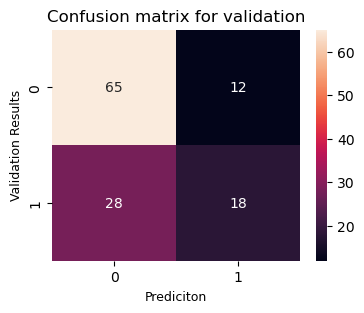

Accuracy: 67.48%


In [41]:
#Confusion matrix

from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix=confusion_matrix(validation_y,val_pred_y)
accuracy=round((conf_matrix[0,0]+conf_matrix[1,1])/conf_matrix.sum()*100,2)

plt.figure(figsize=(4,3))
sns.heatmap(conf_matrix,annot=True)
plt.xlabel('Prediciton',fontsize=9)
plt.ylabel('Validation Results',fontsize=9)
plt.title('Confusion matrix for validation',fontsize=12)
plt.show()
print(f'Accuracy: {accuracy}%')

In [42]:
# Classification Report

from sklearn.metrics import classification_report
print(classification_report(validation_y,val_pred_y))

              precision    recall  f1-score   support

           0       0.70      0.84      0.76        77
           1       0.60      0.39      0.47        46

    accuracy                           0.67       123
   macro avg       0.65      0.62      0.62       123
weighted avg       0.66      0.67      0.66       123



**ROC-receiver operating characteristic curve**
- It's a plot between True Positive Rate and False Positive Rate<br><br>

- $TPR\ (true\  positive\  rate)=\frac{TP}{TP+FN}$<br><br>

- $FPR\ (false\  positive\  rate)=\frac{FP}{FP+TN}$<br><br>

- $threshold=$<br><br>

- $AUC-Area\  Under\  Curve$<br><br>

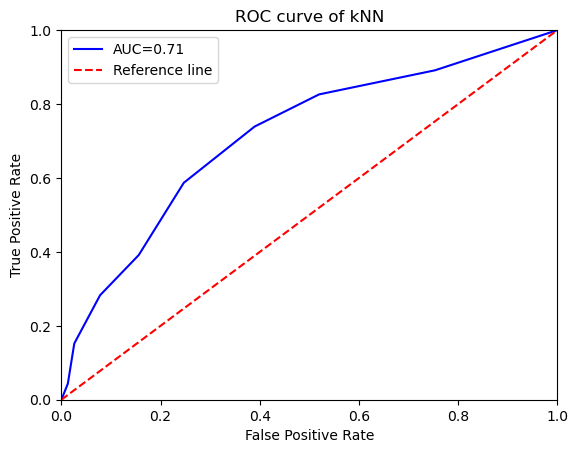

In [43]:
# AUC and ROC Curve

from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

prob_val_y=knn_clf1.predict_proba(validation_x)
fpr,tpr,threshold=roc_curve(validation_y,prob_val_y[:,1])
roc_auc=auc(fpr,tpr)

plt.plot(fpr,tpr,'b',label='AUC=%0.2f'%roc_auc)
plt.plot([0,1],[0,1],'r--',label='Reference line')
# plt.plot(np.linspace(0,1,7),threshold,'v--g',label='Threshold') # concept not clear
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.title('ROC curve of kNN')
plt.show()

# <font color= 'purple'>**PIPELINE**<font>

- Click here to find more details about datasets.
['Brest cancer wisconsin dataset'](https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic))

In [44]:
df=pd.read_csv(r'D:\Datasets\21.wisc_bc_data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [45]:
df.isnull().sum()

id                   0
diagnosis            0
radius_mean          0
texture_mean         0
perimeter_mean       0
area_mean            0
smoothness_mean      0
compactness_mean     0
concavity_mean       0
points_mean          0
symmetry_mean        0
dimension_mean       0
radius_se            0
texture_se           0
perimeter_se         0
area_se              0
smoothness_se        0
compactness_se       0
concavity_se         0
points_se            0
symmetry_se          0
dimension_se         0
radius_worst         0
texture_worst        0
perimeter_worst      0
area_worst           0
smoothness_worst     0
compactness_worst    0
concavity_worst      0
points_worst         0
symmetry_worst       0
dimension_worst      0
dtype: int64

In [46]:
df.shape

(569, 32)

In [47]:
x=df.iloc[:,2:].values
y=df.iloc[:,1].values

In [48]:
np.unique(y)

array(['B', 'M'], dtype=object)

In [49]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
y=le.fit_transform(y)   # we fit the y and transformed it as well, with label encoder

le.transform(['M','B'])   # to show its effect

array([1, 0])

In [50]:
# Save 20% data for testing
# use 80% for training and validation
# We do not tune our model according to test data, thats why we split in training and validation for training

# 80:20

sample_x,test_x,sample_y,test_y=train_test_split(x,y,test_size=0.2,random_state=34)

# 75:25 of 80%, in training and validation

train_x,validation_x,train_y,validation_y=train_test_split(sample_x,sample_y,test_size=0.25,random_state=45)

In [51]:
print('Total Dataset:                        ', len(x))
print('total test data saved for future use: ',len(test_x))
print('Total training data:                  ',len(train_x))
print('Total validation data:                ',len(validation_x))

Total Dataset:                         569
total test data saved for future use:  114
Total training data:                   341
Total validation data:                 114


**Implement Pipeline**

In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

#pipelines are written orderly, 1.scaler, 2.transformer, 3.model
# or in accurate words, in order we need to perform operations.

pipe_lr=Pipeline([('sc',StandardScaler()),('pca',PCA(n_components=2)),('LR',LogisticRegression())])
pipe_lr.fit(train_x,train_y)

print('Validation Accuracy: %.2f %%'%(pipe_lr.score(validation_x,validation_y)*100))

Validation Accuracy: 92.98 %


**Grid Seach**

In [53]:
from sklearn.svm import SVC

SVC().get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [54]:
PCA().get_params()

{'copy': True,
 'iterated_power': 'auto',
 'n_components': None,
 'random_state': None,
 'svd_solver': 'auto',
 'tol': 0.0,
 'whiten': False}

In [55]:
#performing grid seach with pipeline

pipe_svc=Pipeline([('sc',StandardScaler()),('pca',PCA(n_components=2)),('svc',SVC(probability=True))])


param_grid={'pca__n_components': list(np.arange(8,15,1)),
            'svc__C':[0.001,0.01,0.1,1,10,100],
            'svc__gamma':[0.001,0.01,0.1,1,10],
            'svc__kernel':['rbf','poly']}

grid=GridSearchCV(pipe_svc,
                  param_grid=param_grid,
                  cv=5)

grid.fit(train_x,train_y)

#printing results
print('Best parameters: ',grid.best_params_)
print('====================================================================================================')
print('Best cross validation train accuracy: {:.2f}%'.format((grid.best_score_*100)))
print('Validation set accuracy: {:.2f}%'.format(grid.score(validation_x,validation_y)*100))

Best parameters:  {'pca__n_components': 9, 'svc__C': 10, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}
Best cross validation train accuracy: 97.96%
Validation set accuracy: 94.74%


In [56]:
#For final Test
pred_y=grid.predict(test_x)

# Confusion matrix
conf_matrix=confusion_matrix(test_y,pred_y)

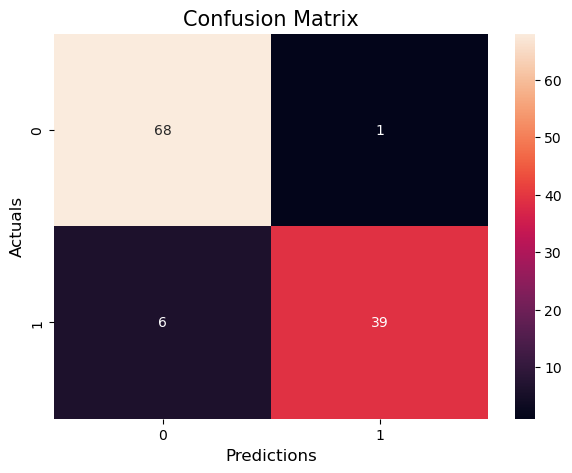

Test set accuracy: 93.86%


In [57]:
#plotting heatmap

plt.figure(figsize=(7,5))
sns.heatmap(conf_matrix,annot=True)
plt.xlabel('Predictions',fontsize=12)
plt.ylabel('Actuals',fontsize=12)
plt.title('Confusion Matrix',fontsize=15)
plt.show()
print('Test set accuracy: {:.2f}%'.format(grid.score(test_x,test_y)*100))

In [58]:
# Classification Report
print(classification_report(test_y,pred_y))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95        69
           1       0.97      0.87      0.92        45

    accuracy                           0.94       114
   macro avg       0.95      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



In [59]:
#ROC AUC using grid.predict_proba(test_x)

test_score_y=grid.predict_proba(test_x)
fpr,tpr,threshold=roc_curve(test_y,test_score_y[:,1])
roc_auc=auc(fpr,tpr)

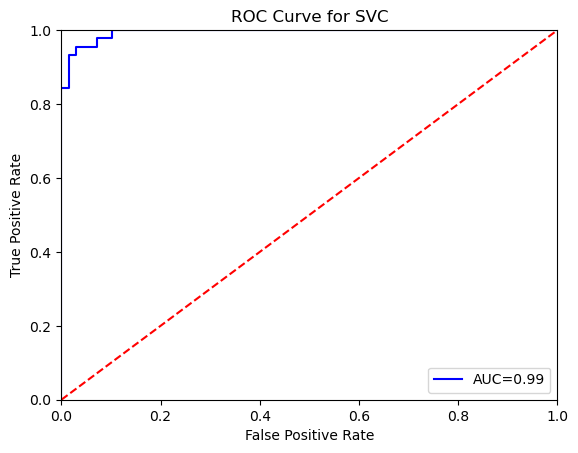

Test set accuracy: 93.86%


In [60]:
#plotting ROC curve

plt.plot(fpr,tpr,'b',label='AUC=%0.2f'% roc_auc)
plt.legend()
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVC')
plt.show()
print('Test set accuracy: {:.2f}%'.format(grid.score(test_x,test_y)*100))

**Another important example**

In [61]:
data_url='http://lib.stat.cmu.edu/datasets/boston'

raw_df=pd.read_csv(data_url,sep='\s+',skiprows=22,header=None)

# hstack horizontally stack data
# for example
#     1st Input array : 
#     [1 2 3]
#     2nd Input array : 
#     [4 5 6]

#     Output horizontally stacked array:
#     [1 2 3 4 5 6]

# [::2] slice data at step of 2

data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]]) # You can check raw data why this step is done

target = raw_df.values[1::2, 2]

In [62]:
x_train, x_test, y_train, y_test = train_test_split(data,target,test_size=0.3)

Random forest regressor model with n_estimators of 5 and max_depth of 3, **without Cross Validation**

In [63]:
# after finding best parameters in GridSearchCV we can recheck by changing parameters
# we are treating our test data as validation data

from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(n_estimators=5,max_depth=5)
rf.fit(x_train,y_train)
print('Training Score: {}%'.format(round(rf.score(x_train,y_train)*100,2)))
print('test: {}%'.format(round(rf.score(x_test,y_test)*100),2))

Training Score: 92.58%
test: 78%


Now Let's try with **Cross Validation**

In [64]:
scores1=cross_val_score(RandomForestRegressor(n_estimators=5,max_depth=3),x_train,y_train,cv=10)
print('Cross validation test score: {}%'.format(round(np.average(scores1)*100,2)))

Cross validation test score: 77.51%


- Cross validation alone is not doing any good.

**Let's combine crossvalidation with grid search**

In [65]:
RandomForestRegressor().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [66]:
model=RandomForestRegressor()

parameters={
            'n_estimators':[20,30,40,60,100],
            'max_depth':[5,10,15,20],
            'max_features':[2,5,8]
        }
grid_search = GridSearchCV(
                            estimator=model,
                            param_grid=parameters,
                            cv=10,
                            n_jobs=-1
        )
grid=grid_search.fit(x_train,y_train)
grid.best_score_

0.8658197606776972

In [67]:
grid.best_params_ # These are the parameters, we are going to check our simple model with

{'max_depth': 15, 'max_features': 5, 'n_estimators': 60}

In [68]:
grid.score(x_test,y_test)

0.817597459468973

<font color='blue'>**5. RandomizedSearchCV**<font>

In Random search CV, the best combination can not be identified because all the combinations are not tested. But the advantage is we can test a broad range of values for hyperparameters within the same computation time as grid search CV.

In [69]:
# we are using same example as GridSearchCV
# but this time with RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

model=RandomForestRegressor()

parameters={
            'n_estimators':[20,30,40,60,100],
            'max_depth':[5,10,15,20],
            'max_features':[2,5,8]
        }
rnd_search = RandomizedSearchCV(
                            model,
                            parameters,
                            cv=10,
                            return_train_score=True
        )
rnd=rnd_search.fit(x_train,y_train)
rnd.best_score_

0.8641052954456075

In [70]:
rnd.best_params_ # we can also try these parameters in simple model and test accuracy

{'n_estimators': 30, 'max_features': 5, 'max_depth': 15}